In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.special import factorial

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [2]:
def metropolis_hastings(moves, zeta, N0=0, M=1, random=False):
    
    #N = {'step 0': N0}
    N = [N0]
    N_old = N0
    
    for i in range(moves):
        
        if random:
            m = np.random.choice(np.arange(1, M+1))
        else:
            m = M
                
        u = np.random.uniform()
        if u < .5:
            N_new = N_old - m
            if N_new<0:
                N_new = 0
            acc_prob = np.minimum(1, factorial(N_old)/(factorial(N_new)*zeta**m))
            if np.isnan(acc_prob):
                acc_prob = 0.
            
            N_old = np.random.choice([N_new, N_old], p=[acc_prob, 1-acc_prob])
        else:
            N_new = N_old + m
            acc_prob = np.minimum(1, (factorial(N_old)*zeta**m)/factorial(N_new))
            if np.isnan(acc_prob):
                acc_prob = 0.
            
            N_old = np.random.choice([N_new, N_old], p=[acc_prob, 1-acc_prob])
        
        N.append(N_old)
        
    return np.asarray(N)

In [34]:
zeta = 10.
M = 1
random = False

In [38]:
N = metropolis_hastings(moves=int(1e6), zeta=zeta, N0=0, M=M, random=random)
N[3538]

12

In [36]:
unique, counts = np.unique(N, return_counts=True)

In [21]:
print(f'mean: {N.mean()}')
print(f'standard deviation: {N.std()}')
print(f'variance: {np.sqrt(N.std())}')

mean: 9.995772004227996
standard deviation: 3.1595924010874783
variance: 1.7775242336146864


In [22]:
p_eq = np.zeros(len(unique))
for i_n, n in enumerate(unique):
    p_eq[i_n] = zeta**n * np.e**(-zeta) / np.math.factorial(n)

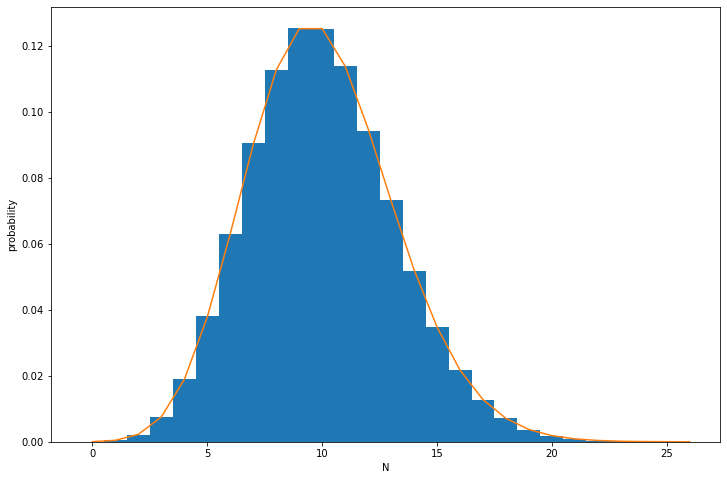

In [23]:
fig1, ax1 = plt.subplots(figsize=(12,8))
probs, _, _ = ax1.hist(N, bins=N.max(), density=True, align='left')
ax1.plot(unique, p_eq)
ax1.set_xlabel('N')
ax1.set_ylabel('probability')
plt.savefig('./figures/N_zeta100_m1.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/N_zeta10_m3.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/N_zeta100_m3.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/N_zeta10_M3.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/N_zeta1000_M100.png', dpi=300, bbox_inches='tight')
plt.show()

In [131]:
NN = np.zeros([5, int(1e6+1)])
              
for seed in tqdm(range(0, 5)):
    np.random.seed(seed+13)
    NN[seed] = metropolis_hastings(moves=int(1e6), zeta=zeta, N0=0, M=M, random=random) 

100%|██████████| 5/5 [03:00<00:00, 36.00s/it]


In [156]:
def correlation(NN, k0, l):
    
    runs = NN.shape[0]
    k = np.arange(k0, k0+10000, 20)
    C = 0
    mean = 0
    
    for i in range(runs):
        for j in range(len(k)):
            C += NN[i, k[j]+l]*NN[i, k[j]]/(len(k))
            mean += NN[i, k[j]]/len(k)
    return C/runs - (mean/runs)**2

In [157]:
C = np.zeros(21)

for i in range(21):
    C[i] = correlation(NN, k0 = 100, l = i)

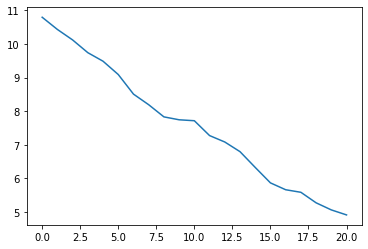

In [158]:
plt.plot(C)

(array([0], dtype=int64),)